In [1]:
import random
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import sympy as sy
from IPython.display import Markdown, display,IFrame

In [2]:
#https://www.glassdoor.co.uk/Interview/Game1-a-dice-roll-with-a-100-faces-dice-labeled-from-1-to-100-1- 
#                                  You-get-to-roll-once-and-receive-the-amount-of-dolla-QTN_1101123.htm
#https://math.stackexchange.com/questions/2078312/roll-a-dice-infinite-times-but-pay-1-to-play-strategy

In [3]:
n,k= sy.symbols('n k')
f = sy.Function('f') 
p = sy.Function('p') 
e = sy.Function('e') 

eq1 = sy.Eq(p(n,k), (n+1-k)/n) # probability n >= k
eq2 = sy.Eq(e(n,k), (n + k)/2) # expectation of n if n >= k

# expectation of game if reroll when >=k 
# prob of rolling >=k  * expectation 
# prob of not rolling >=k * expectation of next roll (expectation of game -1)
eq3 = sy.Eq(f(n,k),
            p(n,k)*e(n,k)+(1-p(n,k))*(f(n,k)-1)) 

ans1 = sy.solve([eq1,eq2,eq3])[0][f(n,k)]
print("Game expectation if reroll >=k")
print(ans1)

print("\nMaximise expectation")
ans2 = sy.solve(sy.diff(ans1,k),k)[0]
print(ans2)

print("\nOptimum reroll for n =100")
solve_k = ans2.subs(n,100)
print(solve_k,"=",solve_k.evalf())

print("\nSubstitute in to solve\n")

for i in range(86,89):
    print("Reroll at {} expectation is {}".format(i,ans1.evalf(subs={n:100, k:i})))


Game expectation if reroll >=k
(k**2 + k - n**2 - n - 2)/(2*(k - n - 1))

Maximise expectation
-sqrt(2)*sqrt(n) + n + 1

Optimum reroll for n =100
101 - 10*sqrt(2) = 86.8578643762690

Substitute in to solve

Reroll at 86 expectation is 87.3333333333333
Reroll at 87 expectation is 87.3571428571429
Reroll at 88 expectation is 87.3076923076923


In [4]:
#simulation and exact solution

def roll(reroll=50):    
    die = random.randint(1,100)
    n = 0
    while die < reroll:
        n += 1
        die = random.randint(1,100)
    return die - n

def expect(n,k):
    return (k**2+k-n**2-n-2)/(2*(k-n-1))

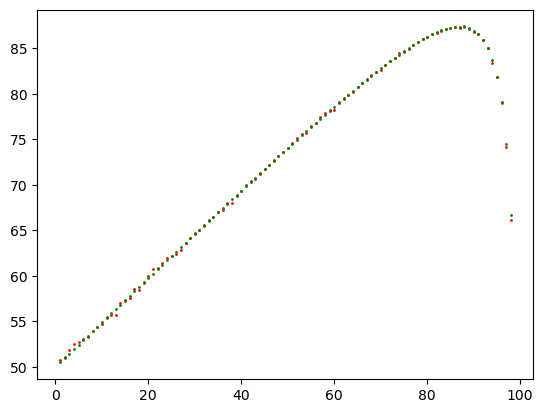

In [5]:
#plot
N =10000
for r in range(1,99):
    plt.plot(r,sum([roll(r) for i in range(N)])/N,"r.",markersize=2)
    plt.plot(r,expect(100,r),"g.",markersize=2)    
plt.show()